In [2]:
# Import Libraries
import pandas as pd
import numpy as np

# Read Park Data
arrest_data = pd.read_csv("arrest_data.csv")

# Process Arrest Data, counting arrests
arrest_count = arrest_data['INCIDENTNEIGHBORHOOD'].value_counts().reset_index()
arrest_count.columns = ['Neighborhood', 'Arrests']

# Remove any neighborhood that have invalid data
arrest_count = arrest_count.dropna()
arrest_count['ArrestsRank'] = arrest_count['Arrests'].rank(ascending=True)

# Sort data by rank
arrest_count = arrest_count.sort_values('ArrestsRank')
arrest_count.head(20)

,Neighborhood,Arrests,ArrestsRank
97,Mt. Oliver Neighborhood,2,1.0
96,Troy Hill-Herrs Island,6,2.0
95,Mt. Oliver Boro,18,3.0
94,Central Northside,23,4.0
92,Regent Square,35,5.5
93,Ridgemont,35,5.5
91,New Homestead,39,7.0
90,Chartiers City,40,8.5
89,Swisshelm Park,40,8.5
88,East Carnegie,48,10.5


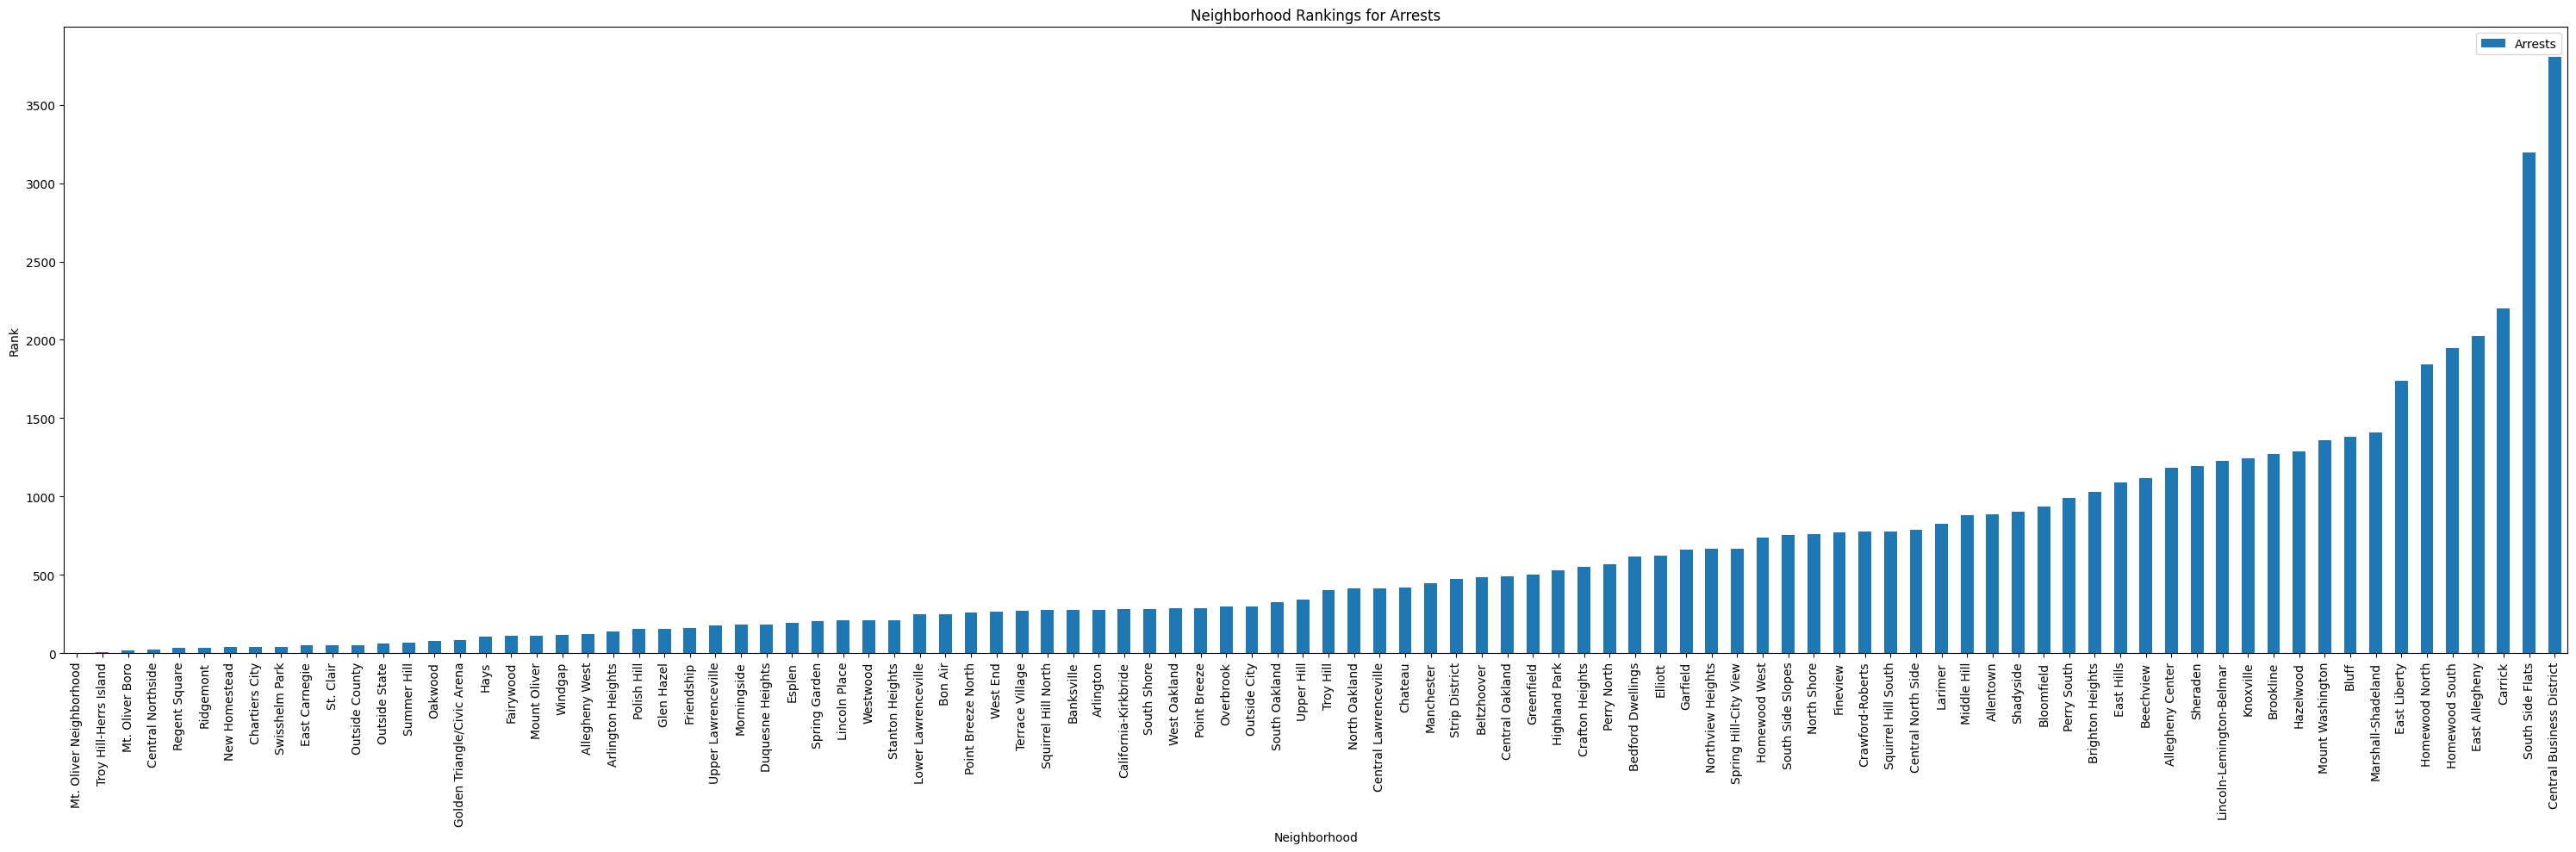

In [5]:
import matplotlib.pyplot as plt

# Limit to 100 entries
arrest_count = arrest_count.nlargest(100, 'Arrests')

# Use Median Income to Plot out Data
plot_data = arrest_count[['Neighborhood','Arrests']].set_index('Neighborhood')
plot_data = plot_data.sort_values('Arrests', ascending=True)

# Create the bar plot
fig, ax = plt.subplots(figsize=(30, 10))
plot_data[['Arrests']].plot(kind='bar', ax=ax)
ax.set_title("Neighborhood Rankings for Arrests")
ax.set_xlabel("Neighborhood")
ax.set_ylabel("Rank")

# Display the plot
plt.tight_layout()
plt.show()

# Conclusion
Best neighborhood: Mt. Oliver Neighborhood

A lower arrest and crime rate in a given neighborhood is highly desirable for families for several reasons. Firstly, it creates a safer and more secure environment for children to grow up in. Parents can feel more at ease allowing their children to play outside and move around the neighborhood without constant supervision. This can lead to a greater sense of freedom and independence for children and can also promote a more active lifestyle. Additionally, a lower crime rate can create a more stable and peaceful community, which can have positive impacts on mental health and well-being. Families may feel more connected to their neighbors and may be more likely to engage in community activities, fostering a sense of belonging and social cohesion. For example, playing in parks but there needs to be parks in the neighborhood (Avneet's analysis). Furthermore, a lower crime rate can also lead to improved property values, which can benefit families who own homes in the area. This might be correlated with income levels (Evan's analysis). Overall, a lower arrest and crime rate in a given neighborhood can provide numerous benefits to families, promoting safety, stability, and community.

This analysis would be better supported though if we knew **all** the crime in an area. For example, there could simply be less arrests in an area because there are less police there, or maybe even that there are petty crimes in the area. Hopefully the other data points from Evan and Avneet will balance out these statistics.
